In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [14]:
type(iris)

sklearn.utils.Bunch

In [15]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 데이터 셋 확인

In [9]:
iris.target.shape

(150,)

In [10]:
iris.data.shape

(150, 4)

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 훈련 / 테스트 데이터 나누기
train_test_split(문제, 답, random_state=0)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

### 시각화 matplotlib / seaborn / pandas

In [0]:
import seaborn as sns

iris_df = pd.DataFrame(x_train, columns=iris.feature_names)
iris_df['y'] = y_train
iris_df['y'] = iris_df['y'].astype('category')

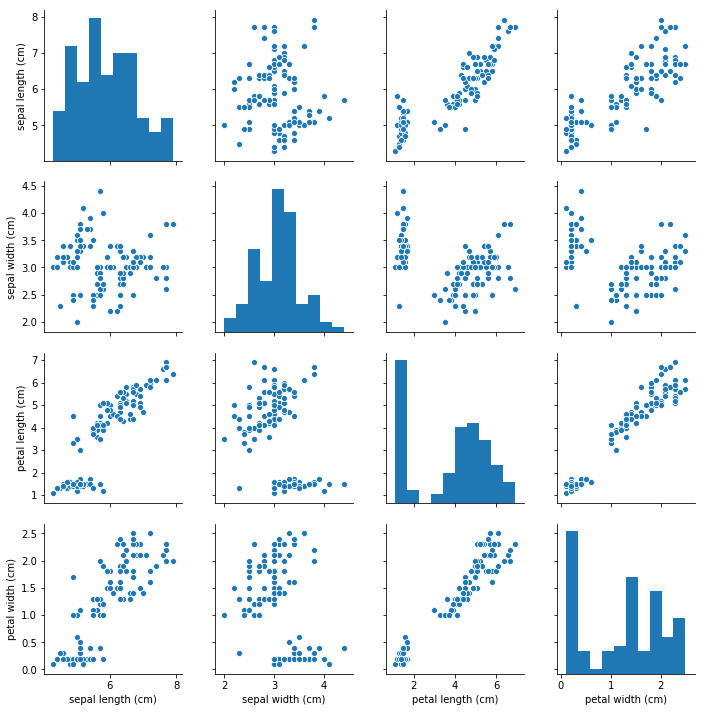

In [21]:
sns.pairplot(iris_df.iloc[: , 0:4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f326762bda0>,
      dtype=object)

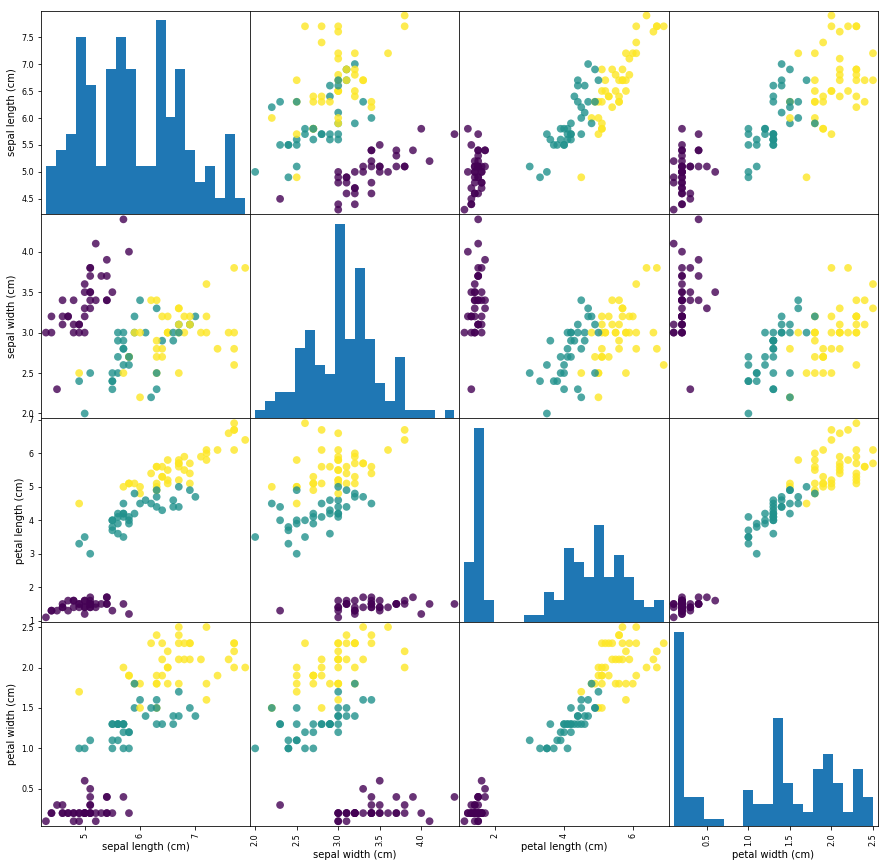

In [22]:
pd.plotting.scatter_matrix(iris_df, c=y_train, # 색
                           figsize = (15,15),
                           marker = 'o',
                           hist_kwds = {'bins' : 20}, # 막대
                           s=60, # size
                           alpha = 0.8) # 투명도

### 첫번째 모델 만들기 ; knn모델
훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k'개의 이웃을 찾는다.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 학습

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 예측

In [27]:
print(type(x_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [29]:
x_new = np.array([[5, 2.9, 1, 0.2]])

pred = knn.predict(x_new)
pred

array([0])

In [30]:
pred_targetname = iris['target_names'][pred]
pred_targetname

array(['setosa'], dtype='<U10')

### 평가

In [32]:
y_pred = knn.predict(x_test)
print('예측값 : \n', y_pred)

예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [33]:
print('테스트 세트의 정확도 : {:.2f}' .format(np.mean(y_pred == y_test)))


테스트 세트의 정확도 : 0.97
